# Linear Algebra Intuition

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# PyTorch
import torch

In [2]:
np.random.seed(42)

### Helper Functions

In [3]:
def sample_grid(M=500, x_max=2.0):
    ii, jj = torch.meshgrid(torch.linspace(-x_max, x_max, M,),
                          torch.linspace(-x_max, x_max, M))
    X_all = torch.cat([ii.unsqueeze(-1),
                     jj.unsqueeze(-1)],
                     dim=-1).view(-1, 2)
    return X_all

# This function assigns a unique color based on position
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)

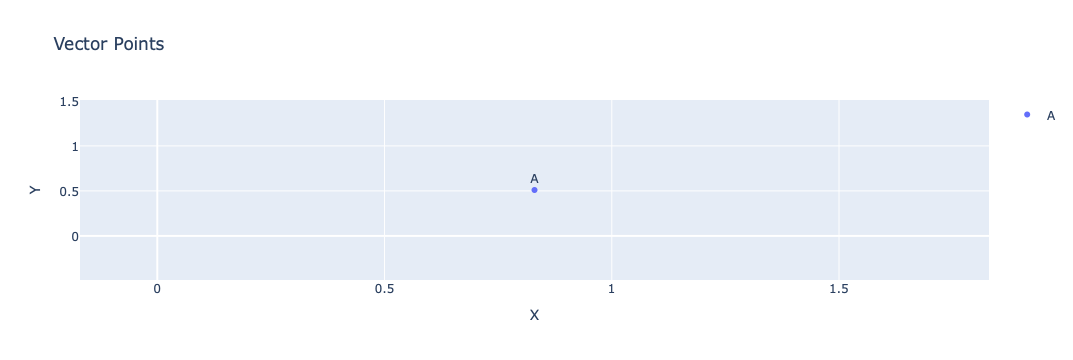

In [13]:
def plot_vector_points(vectors, names=None):
    # Create a figure
    fig = go.Figure()
    
    # Add vectors as points
    for i, vector in enumerate(vectors):
        name = names[i] if names and i < len(names) else f"Vector {i+1}"
        fig.add_trace(go.Scatter(
            x=[vector[0]],
            y=[vector[1]],
            mode='markers+text',
            name=name,
            text=[name],
            textposition="top center"
        ))
    
    # Update layout with correct title property
    fig.update_layout(
        title=dict(text="Vector Points"),  # Use title dict instead of titlefont
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        showlegend=True
    )
    
    # Show the plot
    fig.show()

# Call the function
plot_vector_points([A], names=["A"])

def plot_grid(xygrids, titles, colors, figsize=(16,8)):
    assert len(xygrids)>1
    c = len(xygrids)
    fig, axes = plt.subplots(1, c, figsize=figsize, facecolor="w", sharey=True, sharex=True)
    # Plot grid points 
    # plt.figure()
    for ax, xygrid, title in zip(axes, xygrids, titles):
        ax.scatter(xygrid[:,0], xygrid[:,1], s=36, c=colors, edgecolor="none")
        # Set axis limits
        ax.grid(True)
        # ax1.axis("equal")
        ax.set_title(title)
        ax.set_aspect('equal')
    plt.show()

In [14]:
# def plot_vectors_points(vectors, width=600, height=600, font_size=14, title="Vector Plot"):
#     fig = go.Figure()

#     for i, vector in enumerate(vectors):
#         x0, y0 = 0, 0
#         x1, y1 = vector

#         fig.add_trace(go.Scatter(
#             x=[x0, x1],
#             y=[y0, y1],
#             mode='lines+markers+text',
#             line=dict(width=2),
#             name=f"Vector {i+1}",
#             text=[None, f"v{i+1}"],
#             textposition="top center"
#         ))

#     fig.update_layout(
#         autosize=False,
#         width=width,
#         height=height,
#         title=dict(
#             text=title,
#             font=dict(size=20)
#         ),
#         showlegend=False,
#         xaxis=dict(
#             title="x",
#             titlefont=dict(size=font_size),
#             tickfont=dict(size=font_size),
#             zeroline=True,
#             zerolinewidth=1,
#             zerolinecolor='gray'
#         ),
#         yaxis=dict(
#             title="y",
#             titlefont=dict(size=font_size),
#             tickfont=dict(size=font_size),
#             zeroline=True,
#             zerolinewidth=1,
#             zerolinecolor='gray'
#         )
#     )

#     fig.show()

# def plot_grid(xygrids, titles, colors, figsize=(16,8)):
#     assert len(xygrids)>1
#     c = len(xygrids)
#     fig, axes = plt.subplots(1, c, figsize=figsize, facecolor="w", sharey=True, sharex=True)
#     # Plot grid points 
#     # plt.figure()
#     for ax, xygrid, title in zip(axes, xygrids, titles):
#         ax.scatter(xygrid[:,0], xygrid[:,1], s=36, c=colors, edgecolor="none")
#         # Set axis limits
#         ax.grid(True)
#         # ax1.axis("equal")
#         ax.set_title(title)
#         ax.set_aspect('equal')
#     plt.show()

### Matrix Transformations

In [18]:
A = np.array([0.83, 0.51])
A

array([0.83, 0.51])

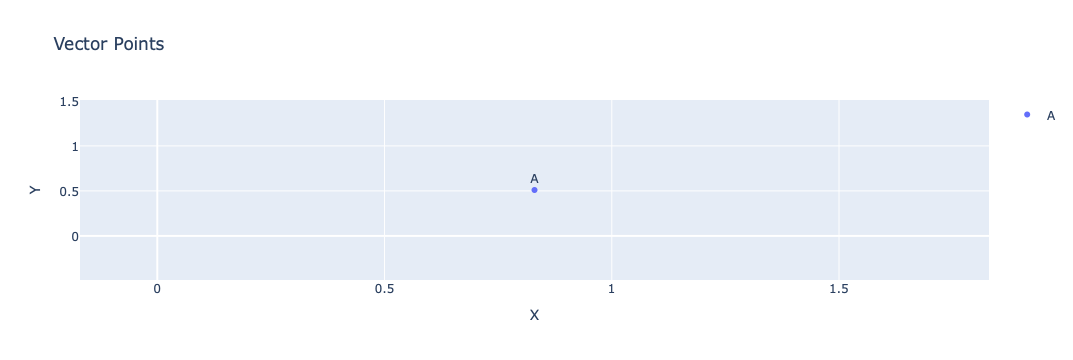

In [19]:
plot_vector_points([A], names=["A"])

In [20]:
def sample_grid(M=20, x_max=2):
    """
    Creates a 2D grid of shape (M*M, 2) within the range [-x_max, x_max]
    """
    x_vals = torch.linspace(-x_max, x_max, M)
    y_vals = torch.linspace(-x_max, x_max, M)
    X, Y = torch.meshgrid(x_vals, y_vals, indexing='ij') 
    grid = torch.stack([X.reshape(-1), Y.reshape(-1)], dim=1)
    return grid


In [22]:
xygrid = sample_grid(M =20, x_max=2).detach().numpy()

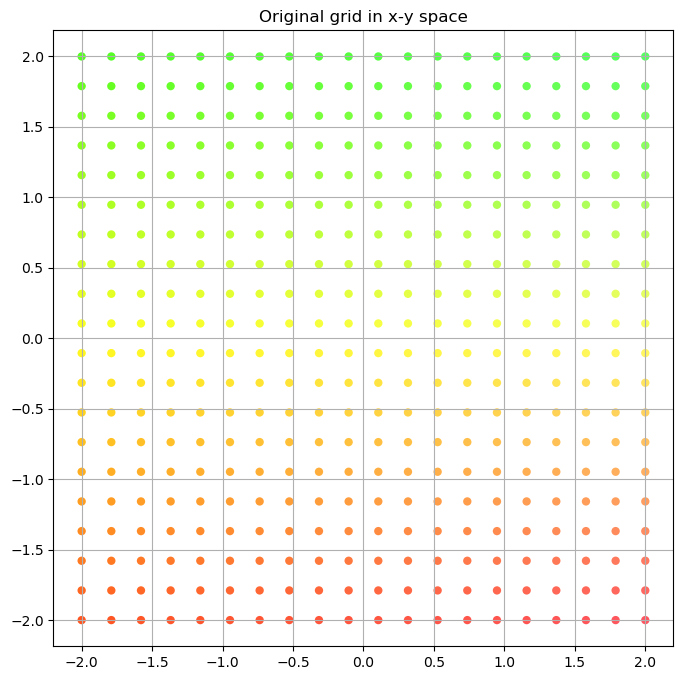

In [23]:
# Map grid coordinates to colors
colors = list(map(colorizer, xygrid[:,0], xygrid[:,1]))

# Plot grid points 
plt.figure(figsize=(8, 8), facecolor="w")
plt.scatter(xygrid[:,0], xygrid[:,1], s=36, c=colors, edgecolor="none")
# Set axis limits
plt.grid(True)
plt.axis("equal")
plt.title("Original grid in x-y space")
plt.show()

### Scaling

#### Scaling Down by `0.5`

In [24]:
S = np.array([[0.5, 0], [0, 0.5]])
S

array([[0.5, 0. ],
       [0. , 0.5]])

In [25]:
# Matrix Multiplication between the vector A and matrix S
AT = S@A
AT

array([0.415, 0.255])

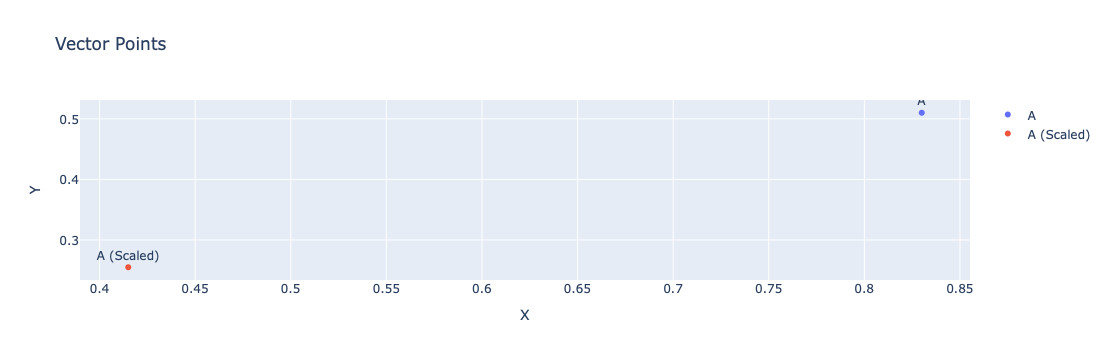

In [26]:
plot_vector_points([A, AT], names=["A", "A (Scaled)"])

#### Scaling Down `The Vector Space`

In [27]:
# Let's apply the same transformation to all the points in our grid
xygrid_t = xygrid.copy()

for i in range(xygrid_t.shape[0]):
    xygrid_t[i,:] = S@xygrid_t[i,:]

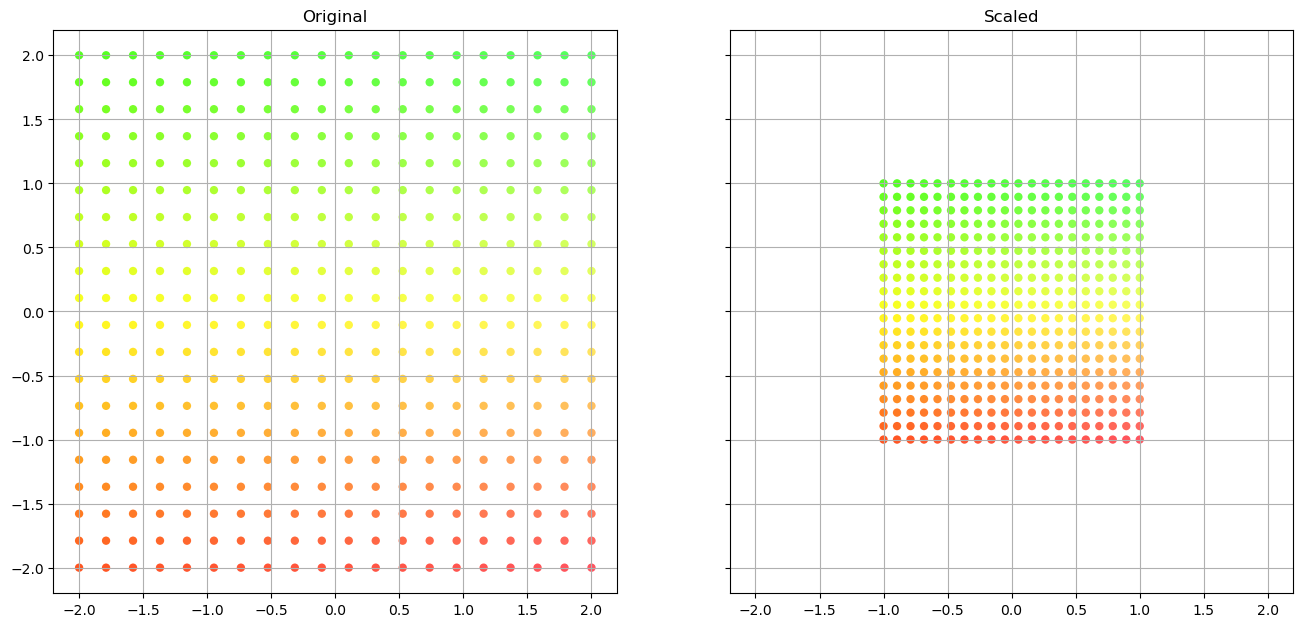

In [28]:
plot_grid([xygrid, xygrid_t], titles=["Original", "Scaled"], colors=colors)